# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#load all the necesssary libraries required for the project

import pickle
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import pandas as pd
import cv2
import collections
import glob
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import textwrap as tt

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
## Checking for number of examples in train, testing and validation sets
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

4


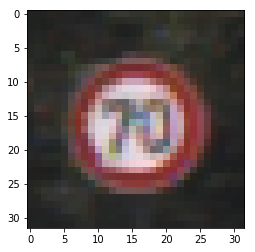

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

#used to generate random numbers between 0-42
ind=np.random.randint(n_train)

plt.imshow(X_train[ind])
print(y_train[ind])

In [6]:
# This code block is to read the classification table to a Dataframe
sgn=pd.read_csv('signnames.csv')
#print(sgn)

In [7]:
## This block is used to display all the unique traffic sign images in the provided dataset
def show_unique_images(x,y,sgn,no_of_cols=5,sav=0):
    no_of_rows=(n_classes//no_of_cols)
    val,ind=np.unique(y,return_index=True)
    
    fig=plt.figure(1, figsize=(15,40))
    
    for i in range(n_classes):
        plt.subplot(11,4,i+1)
        plt.title("\n".join(tt.wrap(str(i)+'. '+sgn['SignName'][val[i]],30))) 
        plt.imshow(x[ind[i]])
        plt.axis('off')
        
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if sav!=0:
        plt.savefig('Unique_Labels.jpg')

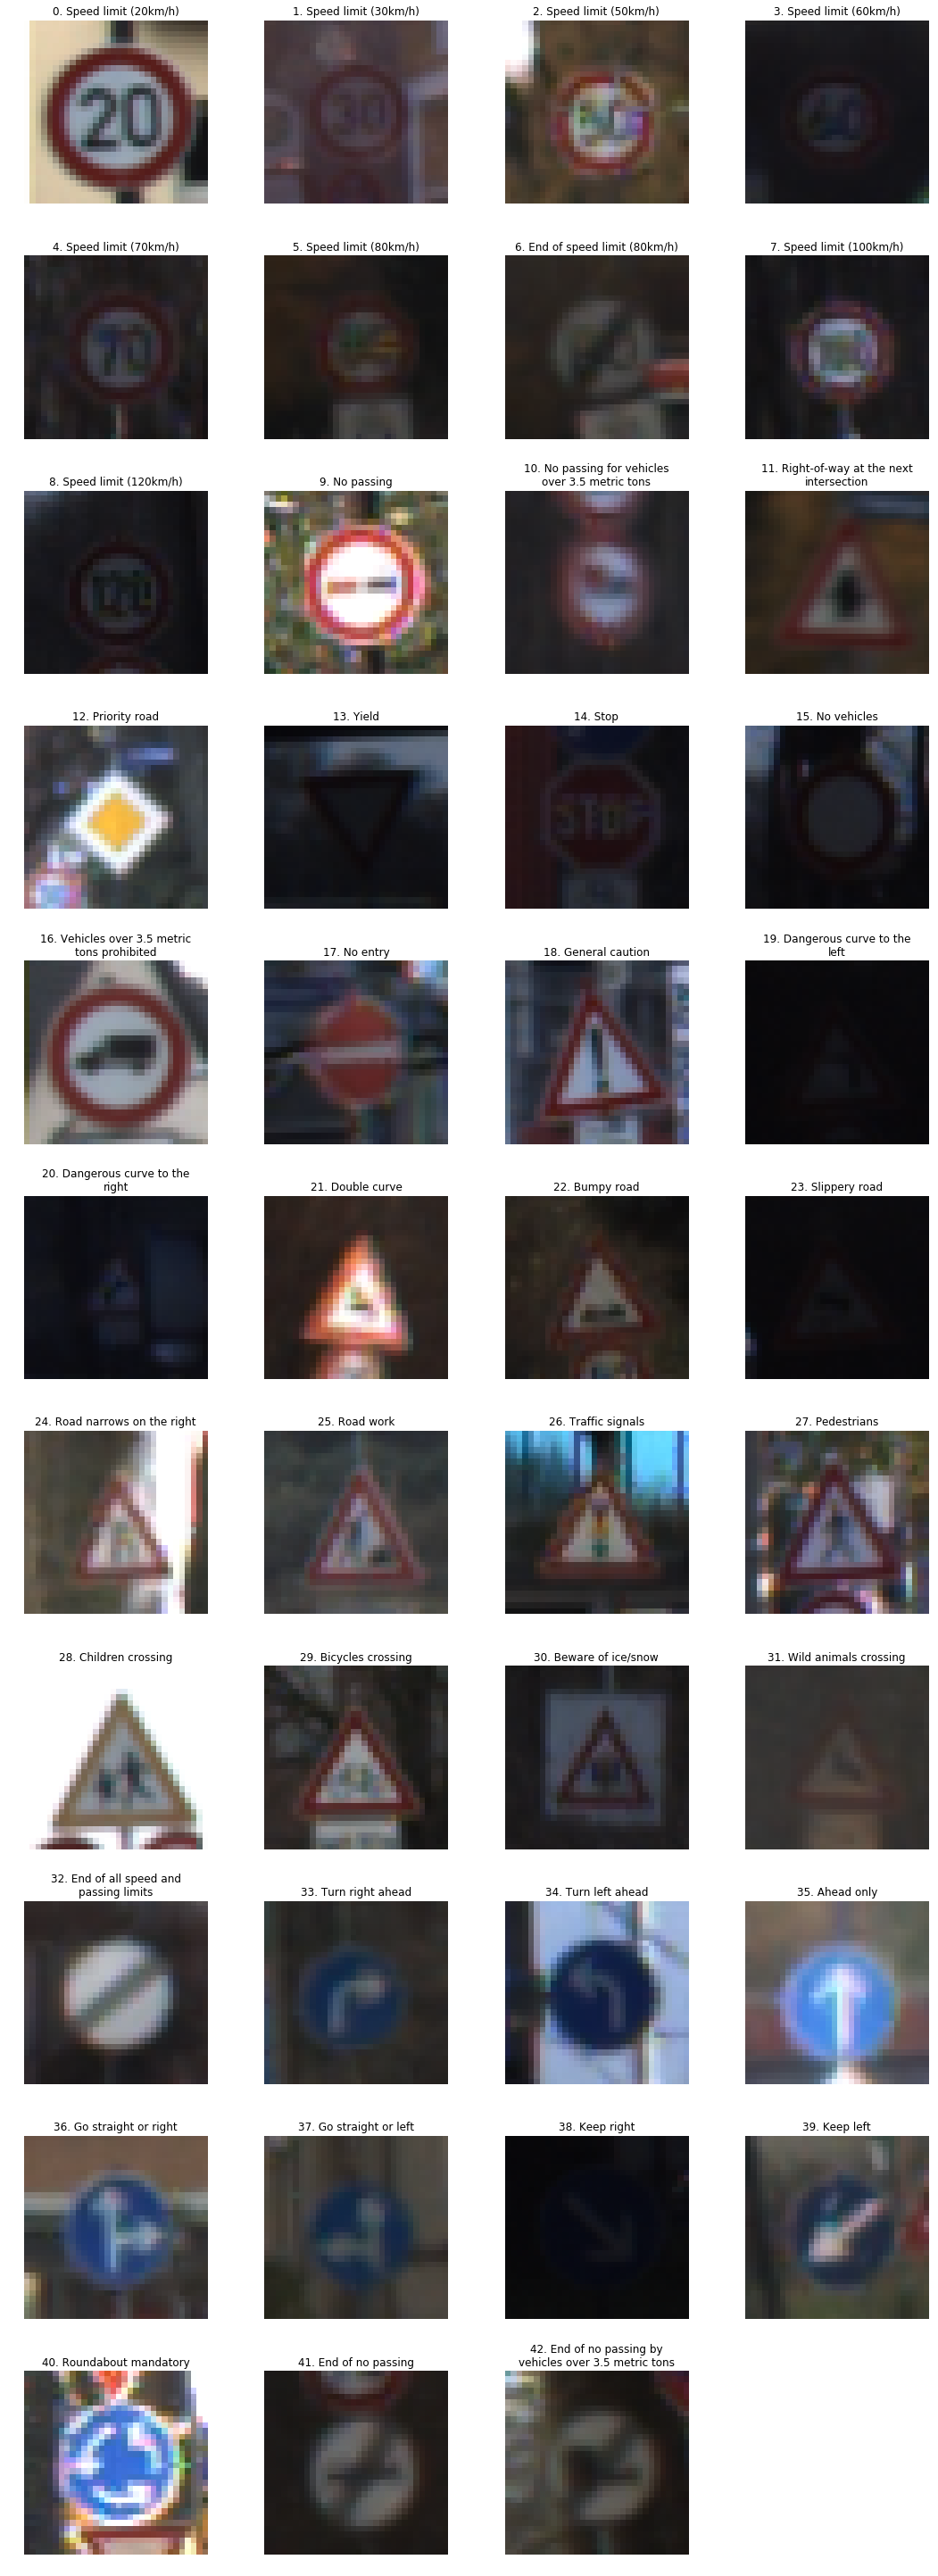

In [8]:
show_unique_images(X_train,y_train,sgn,sav=1)

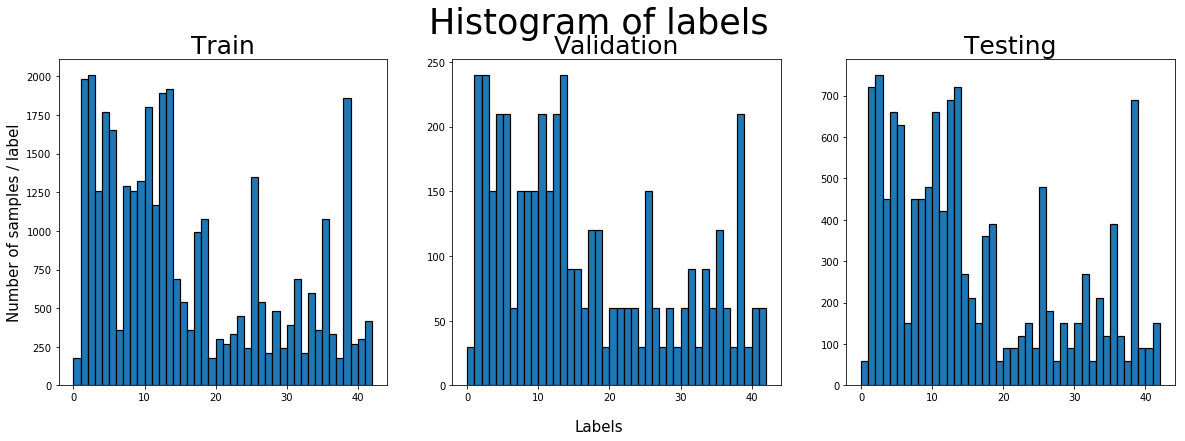

In [9]:
## This code block is used to display histogram of all the labels present in all the datasets

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
ax[0].hist(y_train,bins=len(np.unique(y_train))-1,edgecolor='black', linewidth=1.2)
ax[0].set_title("Train",fontsize=25)
ax[0].set_ylabel("Number of samples / label", fontsize=15)

ax[1].hist(y_valid,bins=len(np.unique(y_train))-1,edgecolor='black', linewidth=1.2)
ax[1].set_title("Validation",fontsize=25)

ax[2].hist(y_test,bins=len(np.unique(y_train))-1,edgecolor='black', linewidth=1.2)
ax[2].set_title("Testing",fontsize=25)

#fig.suptitle('Histogram of labels\n', fontsize=25)
#plt.tight_layout()
fig.text(0.5, 0.94, 'Histogram of labels', ha='center', fontsize=35)
fig.text(0.5, 0.02, 'Labels', ha='center', fontsize=15)

plt.savefig("Dataset_Histogram.jpg")
plt.show()

In [10]:
## Used to display top 5 labels which have maximum samples 

def top_labels(arr,top=5): 
    freq=collections.Counter(arr)
    top_val=[i for i,_ in freq.most_common(top)]
    return top_val

print(sgn['SignName'][top_labels(y_train)],"\n")
print(sgn['SignName'][top_labels(y_valid)],"\n")
print(sgn['SignName'][top_labels(y_test)],"\n")

2     Speed limit (50km/h)
1     Speed limit (30km/h)
13                   Yield
12           Priority road
38              Keep right
Name: SignName, dtype: object 

1     Speed limit (30km/h)
13                   Yield
2     Speed limit (50km/h)
4     Speed limit (70km/h)
5     Speed limit (80km/h)
Name: SignName, dtype: object 

2     Speed limit (50km/h)
1     Speed limit (30km/h)
13                   Yield
38              Keep right
12           Priority road
Name: SignName, dtype: object 



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Normalize the image pixels between 0.1 and 0.9
def normalzd_image(x):
    x=grey_image(x)  # Color to grayscale image
    x=equalize_hist(x) # Equalize histogram of the image
    x=np.reshape(x,[x.shape[0],x.shape[1],1])
    a=0.1
    b=0.9
    normlzd=a+((b-a)*(x-np.min(x))/(np.max(x)-np.min(x))) # normalize image
    return normlzd

## converting image to grayscale image
def grey_image(x):
    gray= cv2.cvtColor(x,cv2.COLOR_RGB2GRAY)
    return gray

## Function used for adaptive contrast equalization
## Takes grayscale image as input
def equalize_hist(x):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(x)
    return cl1

## Generating datasets with above mentioned preprocessing steps
X_norm_tr=np.array([normalzd_image(X_train[i]) for i in range(len(X_train))])
X_norm_val=np.array([normalzd_image(X_valid[i]) for i in range(len(X_valid))])
X_norm_test=np.array([normalzd_image(X_test[i]) for i in range(len(X_test))])

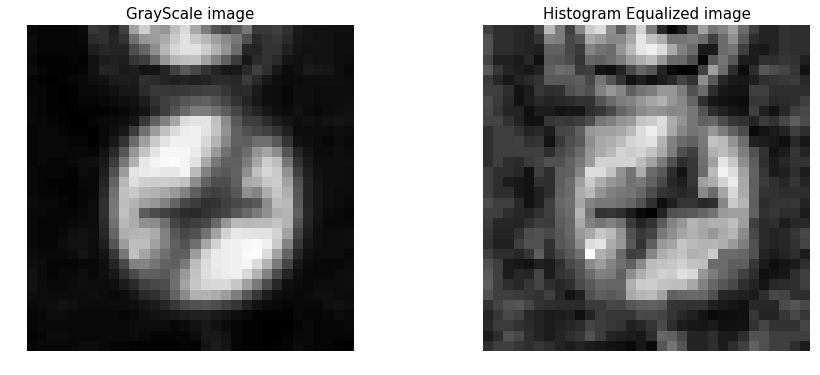

In [12]:
## Comparison between grayscale image and contrast equalized image
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax[0].imshow(grey_image(X_train[0]),cmap='gray')
ax[0].set_title('GrayScale image',fontsize=15)
ax[0].axis('off')

ax[1].imshow(equalize_hist(grey_image(X_train[0])),cmap='gray')
ax[1].set_title('Histogram Equalized image',fontsize=15)
ax[1].axis('off')
plt.show()
fig.savefig('grayscale_conv.jpg')

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

###################################################################################
## LeNet-5 Architecture
##################################################################################


learning_rate=0.0003
epoch=150
batch_size=128
keep_prob=0.8
top_k=5

def lenet(x):
    mu=0
    sigma=0.1
    
    weights={
        'wc1':tf.Variable(tf.truncated_normal([5,5,1,6],mean=mu,stddev=sigma),tf.float32),
        'wc2':tf.Variable(tf.truncated_normal([5,5,6,16],mean=mu,stddev=sigma),tf.float32),
        'wc3':tf.Variable(tf.truncated_normal([400,120],mean=mu,stddev=sigma),tf.float32),
        'wc4':tf.Variable(tf.truncated_normal([120,84],mean=mu,stddev=sigma),tf.float32),
        'wc5':tf.Variable(tf.truncated_normal([84,43],mean=mu,stddev=sigma),tf.float32)
    }
    
    bias={
        'b1':tf.Variable(tf.zeros([6])),
        'b2':tf.Variable(tf.zeros([16])),
        'b3':tf.Variable(tf.zeros([120])),
        'b4':tf.Variable(tf.zeros([84])),
        'b5':tf.Variable(tf.zeros([43]))
    }
    
    k=2
    stride=[1,1,1,1]
    
    conv1_w=tf.nn.conv2d(x,weights['wc1'],stride,padding='VALID')
    covn1_b=tf.nn.bias_add(conv1_w,bias['b1'])
    conv1_relu=tf.nn.relu(covn1_b,name='Conv1')
    
    conv1_pool=tf.nn.max_pool(conv1_relu,[1,k,k,1],[1,k,k,1],padding='VALID')
    
    conv2_w=tf.nn.conv2d(conv1_pool,weights['wc2'],stride,padding='VALID')
    covn2_b=tf.nn.bias_add(conv2_w,bias['b2'])
    conv2_relu=tf.nn.relu(covn2_b,name='Conv2')
    #conv2_relu = tf.nn.dropout(conv2_relu, keep_prob)
    
    conv2_pool=tf.nn.max_pool(conv2_relu,[1,k,k,1],[1,k,k,1],padding='VALID')
    
    conv2_flat=tf.reshape(conv2_pool,[-1,weights['wc3'].get_shape().as_list()[0]])
    
    conv3=tf.add(tf.matmul(conv2_flat,weights['wc3']),bias['b3'])
    conv3_relu=tf.nn.relu(conv3)
    conv3_relu = tf.nn.dropout(conv3_relu, keep_prob)
    
    conv4=tf.add(tf.matmul(conv3_relu,weights['wc4']),bias['b4'])
    conv4_relu=tf.nn.relu(conv4)
    conv4_relu = tf.nn.dropout(conv4_relu, keep_prob)
    
    logits=tf.add(tf.matmul(conv4_relu,weights['wc5']),bias['b5'])
    
    return logits,conv1_relu,conv2_relu

x=tf.placeholder(tf.float32,(None,32,32,1),name='x')
labels=tf.placeholder(tf.int32,(None),name='labels')
one_hot_labels=tf.one_hot(labels,n_classes)

logits,conv1,conv2=lenet(x)
predictions=tf.nn.softmax(logits,name='probabiblity')
top_values, top_indices = tf.nn.top_k(predictions, k=top_k,name='topk')
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_labels)
cost=tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction=tf.equal(tf.argmax(predictions,1),tf.argmax(one_hot_labels,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver=tf.train.Saver()

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#############################################################################
## Modified CNN Architecture
##############################################################################

## Hyperparameters
learning_rate=0.001
epoch=150
batch_size=128
keep_prob=0.8
top_k=5

def lenet(x):
    # Input image X - 32x32x1 
    # (grayscale image is used in image detection)
    
    ## Mean and sigma used to initialize weights of each layer
    mu=0
    sigma=0.1
    
    
    k=2   # Size for max pool layer
    stride=[1,1,1,1]  # Stride for convolution operation
    
    ##############################################################################
    ## Convolution layer 1 ########
    ## Weights (wc1) - 5x5x1x10
    ## Bias (b1) - 10
    
    wc1=tf.Variable(tf.truncated_normal([5,5,1,10],mean=mu,stddev=sigma),tf.float32)
    shap_w1=wc1.get_shape().as_list()[-1] # shape of last index of weight matrix
    b1=tf.Variable(tf.zeros([shap_w1]))
    
    conv1_w=tf.nn.conv2d(x,wc1,stride,padding='VALID') # convolution operation
    covn1_b=tf.nn.bias_add(conv1_w,b1)  # bias additon operation
    conv1_relu=tf.nn.relu(covn1_b,name='Conv1') # Relu activation function
    
    ## Output of layer 1 (conv1_relu) -- 28x28x10

    
    ## Max pooling of layer 1
    conv1_pool=tf.nn.max_pool(conv1_relu,[1,k,k,1],[1,k,k,1],padding='VALID')
    
    ## Output of max pooling (conv1_pool) -- 14x14x10

    shap1=conv1_pool.get_shape().as_list() # shape of pooling layer
    flat_size1=shap1[1]*shap1[2]*shap1[3]
    conv1_flat=tf.reshape(conv1_pool,[-1,flat_size1]) # Flattening operation of pooling layer
    
    #####################################################################################
    ## Convolution layer 2 ########
    ## Weights (wc1) - 5x5x10x20
    ## Bias (b1) - 20
    
    wc2=tf.Variable(tf.truncated_normal([5,5,10,20],mean=mu,stddev=sigma),tf.float32)
    shap_w2=wc2.get_shape().as_list()[-1] # shape of last index of weight matrix
    b2=tf.Variable(tf.zeros([shap_w2]))
    
    conv2_w=tf.nn.conv2d(conv1_pool,wc2,stride,padding='VALID',) # convolution operation
    covn2_b=tf.nn.bias_add(conv2_w,b2) # bias addition operation
    conv2_relu=tf.nn.relu(covn2_b,name='Conv2') # Relu activation function 
    
    ## Output of layer 1 (conv1_relu) -- 10x10x20
    
    shap2=conv2_relu.get_shape().as_list() # shape of convolution layer
    flat_size2=shap2[1]*shap2[2]*shap2[3]
    conv2_flat=tf.reshape(conv2_relu,[-1,flat_size2]) # Flattening operation of convolution layer
    
    #####################################################################################
    ## Convolution layer 3 ######
    ## Weights (wc1) - 5x5x20x40
    ## Bias (b1) - 40
    
    wc2m=tf.Variable(tf.truncated_normal([5,5,20,40],mean=mu,stddev=sigma),tf.float32)
    shap_w2m=wc2m.get_shape().as_list()[-1] # shape of last index of weight matrix
    b2m=tf.Variable(tf.zeros([shap_w2m]))
    
    conv2_wm=tf.nn.conv2d(conv2_relu,wc2m,stride,padding='VALID',) # convolution operation
    covn2_bm=tf.nn.bias_add(conv2_wm,b2m) # bias addition operation
    conv2_relum=tf.nn.relu(covn2_bm,name='Conv2') # Relu activation function
    
    ## Output of layer 3 (conv2_relum) -- 6x6x40

    ## Max pooling of layer 3
    conv2m_pool=tf.nn.max_pool(conv2_relum,[1,k,k,1],[1,k,k,1],padding='VALID')
    
    ## Output of max pooling (conv2m_pool) -- 3x3x40
    
    shap2m=conv2m_pool.get_shape().as_list() # shape of convolution layer
    flat_size2m=shap2m[1]*shap2m[2]*shap2m[3]
    conv2m_flat=tf.reshape(conv2m_pool,[-1,flat_size2m]) # Flattening operation of convolution layer

    
    #######################################################################################
    ## Combining all the parameters from the flattened convolutional layers 
    
    comb_conv12=tf.concat([conv1_flat,conv2_flat,conv2m_flat],axis=1)    
    
    #######################################################################################
    ## Fully connected layer 1 from comb_conv12
    
    wc3=tf.Variable(tf.truncated_normal([flat_size1+flat_size2+flat_size2m,400],mean=mu,stddev=sigma),tf.float32)
    shap_w3=wc3.get_shape().as_list()[-1]
    b3=tf.Variable(tf.zeros([shap_w3]))
    
    conv3=tf.add(tf.matmul(comb_conv12,wc3),b3)
    conv3_relu=tf.nn.relu(conv3)
    conv3_relu = tf.nn.dropout(conv3_relu, keep_prob) # Dropout operation

    #######################################################################################
    ## Fully connected layer 2 
    
    wc4=tf.Variable(tf.truncated_normal([shap_w3,120],mean=mu,stddev=sigma),tf.float32)
    shap_w4=wc4.get_shape().as_list()[-1]
    b4=tf.Variable(tf.zeros([shap_w4]))
    
    conv4=tf.add(tf.matmul(conv3_relu,wc4),b4)
    conv4_relu=tf.nn.relu(conv4)
    conv4_relu = tf.nn.dropout(conv4_relu, keep_prob) # Dropout operation
    
    #######################################################################################
    ## Fully connected layer 3 
    
    wc5=tf.Variable(tf.truncated_normal([shap_w4,n_classes],mean=mu,stddev=sigma),tf.float32)
    b5=tf.Variable(tf.zeros([n_classes]))
    
    logits=tf.add(tf.matmul(conv4_relu,wc5),b5)
    
    return logits,conv1_relu,conv2_relu


x=tf.placeholder(tf.float32,(None,32,32,1),name='x') # Placeholder for input images (32x32x1)
labels=tf.placeholder(tf.int32,(None),name='labels') # Placeholder for for labels (32x32x1)
one_hot_labels=tf.one_hot(labels,n_classes) # conversion of labels using one-hot encoding 

#####################################################################################
## Predictions and cross-entropy calculation

logits,conv1,conv2=lenet(x)  # Passing of images to network for training
predictions=tf.nn.softmax(logits,name='probabiblity') # Predictions of the labels
top_values, top_indices = tf.nn.top_k(predictions, k=top_k,name='topk') # find out top five predictions from network
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_labels) #cross-entr
cost=tf.reduce_mean(cross_entropy) ## cost calculation from cross entropy
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) ## Adam optimizer for training the network

##################################################################################
## Accuracy calculation

correct_prediction=tf.equal(tf.argmax(predictions,1),tf.argmax(one_hot_labels,1)) ## Checking against ground truth
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) ## Accuracy calculation
saver=tf.train.Saver() 

In [13]:
## Used to get variable values from the saved model
 
print(x)
print(labels)
print(predictions)
print(top_values)
print(top_indices)
print(accuracy)
print(conv1)
print(conv2)

Tensor("x:0", shape=(?, 32, 32, 1), dtype=float32)
Tensor("labels:0", dtype=int32)
Tensor("probabiblity:0", shape=(?, 43), dtype=float32)
Tensor("topk:0", shape=(?, 5), dtype=float32)
Tensor("topk:1", shape=(?, 5), dtype=int32)
Tensor("Mean_1:0", dtype=float32)
Tensor("Conv1:0", shape=(?, 28, 28, 10), dtype=float32)
Tensor("Conv2:0", shape=(?, 10, 10, 20), dtype=float32)


# Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x_val_shuffle,y_val_shuffle=shuffle(X_norm_val,y_valid) # Shuffling of validation dataset

best_acc=0 ## global variable for best validation accuracy 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_accuracy=[]
    valid_accuracy=[]
    for i in range(epoch):
        x_tr_shuffle,y_tr_shuffle=shuffle(X_norm_tr,y_train) # shuffling of training dataset
        for start in range(0, n_train, batch_size):
            batch_x=x_tr_shuffle[start:start+batch_size]
            batch_y=y_tr_shuffle[start:start+batch_size]
            sess.run(optimizer,feed_dict={x:batch_x,labels:batch_y})
            
        tr_acc=sess.run(accuracy,feed_dict={x:x_tr_shuffle,labels:y_tr_shuffle})
        val_acc=sess.run(accuracy,feed_dict={x:x_val_shuffle,labels:y_val_shuffle})
        
        ## Checking for better accuracy 
        ## Saving model if better accracy is obtained
        if best_acc<val_acc:
            best_acc=val_acc
            best_i=i+1
            saver.save(sess, "model_n")
        
        ## Saving training and validation accuracies for plotting purposes
        
        train_accuracy.append(tr_acc)
        valid_accuracy.append(val_acc)
        
        ## printing accuracies every 10 epochs
        
        if not i%10:
            print("Epoch {}...".format(i+1))
            print("Train_Accuracy = {:.4f} ".format(tr_acc))
            print("Validation_Accuracy = {:.4f}".format(val_acc))
            print("Best Validation_Accuracy = {:.4f} @ iteration {:} \n".format(best_acc,best_i))
            
    ## Printing best validation and training accuracy found while model training
    print("Max Train_Accuracy = {:.4f}".format(max(train_accuracy)))
    print("Max Validation_Accuracy = {:.4f}\n".format(max(valid_accuracy)))
    
    print("Model Saved")

Epoch 1...
Train_Accuracy = 0.9139 
Validation_Accuracy = 0.8599
Best Validation_Accuracy = 0.8599 @ iteration 1 

Epoch 11...
Train_Accuracy = 0.9970 
Validation_Accuracy = 0.9590
Best Validation_Accuracy = 0.9590 @ iteration 11 

Epoch 21...
Train_Accuracy = 0.9969 
Validation_Accuracy = 0.9619
Best Validation_Accuracy = 0.9701 @ iteration 19 

Epoch 31...
Train_Accuracy = 0.9971 
Validation_Accuracy = 0.9642
Best Validation_Accuracy = 0.9710 @ iteration 28 

Epoch 41...
Train_Accuracy = 0.9986 
Validation_Accuracy = 0.9649
Best Validation_Accuracy = 0.9757 @ iteration 39 

Epoch 51...
Train_Accuracy = 0.9986 
Validation_Accuracy = 0.9789
Best Validation_Accuracy = 0.9789 @ iteration 51 

Epoch 61...
Train_Accuracy = 0.9993 
Validation_Accuracy = 0.9680
Best Validation_Accuracy = 0.9800 @ iteration 52 

Epoch 71...
Train_Accuracy = 0.9989 
Validation_Accuracy = 0.9719
Best Validation_Accuracy = 0.9800 @ iteration 52 

Epoch 81...
Train_Accuracy = 0.9992 
Validation_Accuracy = 0.9726


In [15]:
best_acc

0.98049915

(0.8, 1)

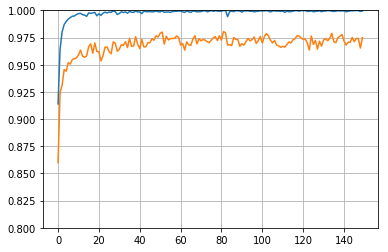

In [16]:
## Plotting of validation and training dataset accuracies
plt.plot(range(len(train_accuracy)),train_accuracy)
plt.plot(range(len(valid_accuracy)),valid_accuracy)
plt.grid(True)
plt.gca().set_ylim([0.8,1])

In [12]:
## Restoring previously saved model and calulating accuracy on test dataset

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model_n.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    
    val_acc=sess.run("Mean_1:0",feed_dict={"x:0":X_norm_val,"labels:0":y_valid})
    pred_vl=sess.run("probabiblity:0",feed_dict={"x:0":X_norm_val,"labels:0":y_valid})
    
    test_acc=sess.run("Mean_1:0",feed_dict={"x:0":X_norm_test,"labels:0":y_test})
    pred_tr=sess.run("probabiblity:0",feed_dict={"x:0":X_norm_test,"labels:0":y_test})
    
    print("Validation Accuracy = {:.4f}".format(val_acc))
    print("Test Accuracy = {:.4f}\n".format(test_acc))
   
    ## Confusion matrix calculation
    
    conf_tr=confusion_matrix(y_test,np.argmax(pred_tr,1)) 
    conf_vl=confusion_matrix(y_valid,np.argmax(pred_vl,1))

INFO:tensorflow:Restoring parameters from ./model_n
Validation Accuracy = 0.9798
Test Accuracy = 0.9595



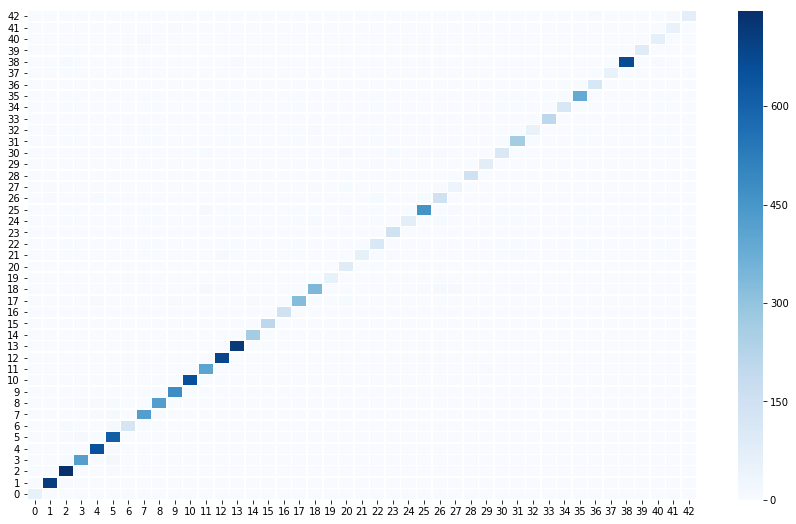

In [13]:
### Plotting of confusion matrix

f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(conf_tr,cmap="Blues", linewidths=.5, ax=ax)
ax.invert_yaxis()


In [22]:
## Calculation of precision, recall and F-score on training and validation datasets

precision, recall, fscore, support = score(y_test, np.argmax(pred_tr,1))
precision_vl, recall_vl, fscore_vl, support_vl = score(y_valid, np.argmax(pred_vl,1))

In [23]:
## Dataframe for storing precision, recall and F-score
scor_tr=pd.DataFrame(columns=['Precision','Recall','F-score','Support'])
scor_tr['Precision']=precision
scor_tr['Recall']=recall
scor_tr['F-score']=fscore
scor_tr['Support']=support

scor_vl=pd.DataFrame(columns=['Precision','Recall','F-score','Support'])
scor_vl['Precision']=precision_vl
scor_vl['Recall']=recall_vl
scor_vl['F-score']=fscore_vl
scor_vl['Support']=support_vl

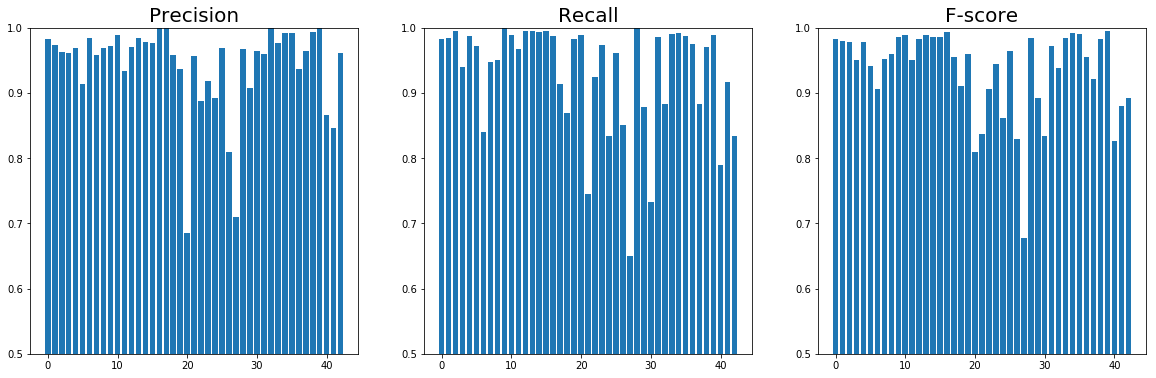

In [24]:
## Plotting of precision, recall and F-score for test dataset

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax[0].bar(range(len(scor_tr['Precision'])),scor_tr['Precision'])
ax[0].set_ylim([0.5, 1])
ax[0].set_title('Precision',fontsize=20)

ax[1].bar(range(len(scor_tr['Recall'])),scor_tr['Recall'])
ax[1].set_ylim([0.5, 1])
ax[1].set_title('Recall',fontsize=20)

ax[2].bar(range(len(scor_tr['F-score'])),scor_tr['F-score'])
ax[2].set_ylim([0.5, 1])
ax[2].set_title('F-score',fontsize=20)

plt.show()

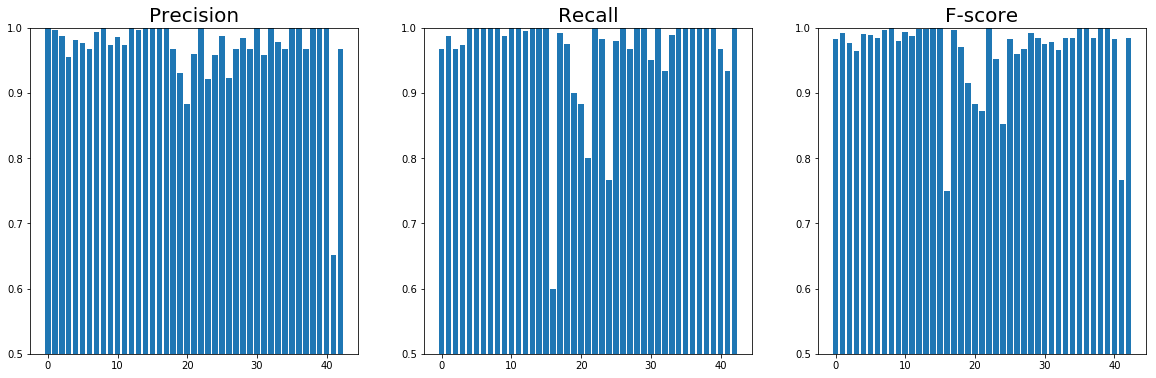

In [25]:
## Plotting of precision, recall and F-score for validation dataset

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax[0].bar(range(len(scor_vl['Precision'])),scor_vl['Precision'])
ax[0].set_ylim([0.5, 1])
ax[0].set_title('Precision',fontsize=20)

ax[1].bar(range(len(scor_vl['Recall'])),scor_vl['Recall'])
ax[1].set_ylim([0.5, 1])
ax[1].set_title('Recall',fontsize=20)

ax[2].bar(range(len(scor_vl['F-score'])),scor_vl['F-score'])
ax[2].set_ylim([0.5, 1])
ax[2].set_title('F-score',fontsize=20)

plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


In [27]:
# Used for image resizing to 32x32 pixels

test_img='GTS_Images1/Yield.jpg'
#for img_name in glob.glob(test_img):
img=cv2.imread(test_img)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_resize=cv2.resize(img,(32,32),interpolation = cv2.INTER_AREA)
cv2.imwrite(test_img[:-4]+'_res.jpg',img_resize)

True

### Predict the Sign Type for Each Image

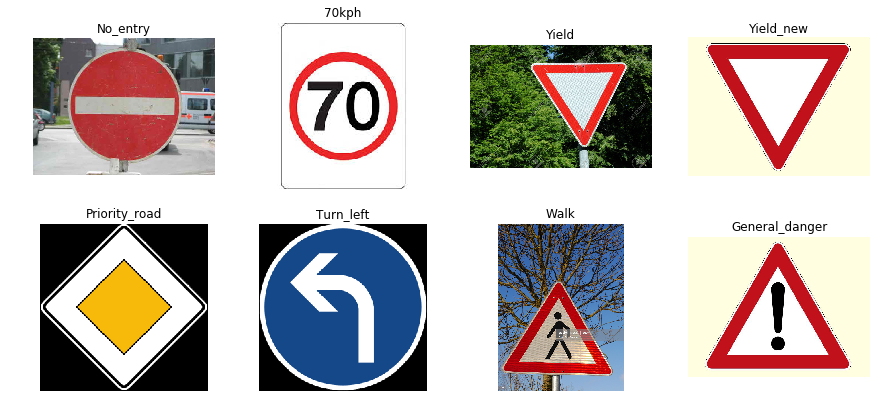

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
all_img='GTS_Images1/*.jpg'
test_img='GTS_Images1/*_res.jpg'
fig=plt.figure(1, figsize=(15,40))
orig=set(glob.glob(all_img)) - set(glob.glob(test_img))

for i,nm in enumerate(orig):
    img=cv2.imread(nm)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(11,4,i+1)
    plt.title(nm.split('/')[-1].split('.')[0])
    plt.imshow(img)
    plt.axis('off')

fig.savefig('GTS_downld.jpg')

INFO:tensorflow:Restoring parameters from ./model_n


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


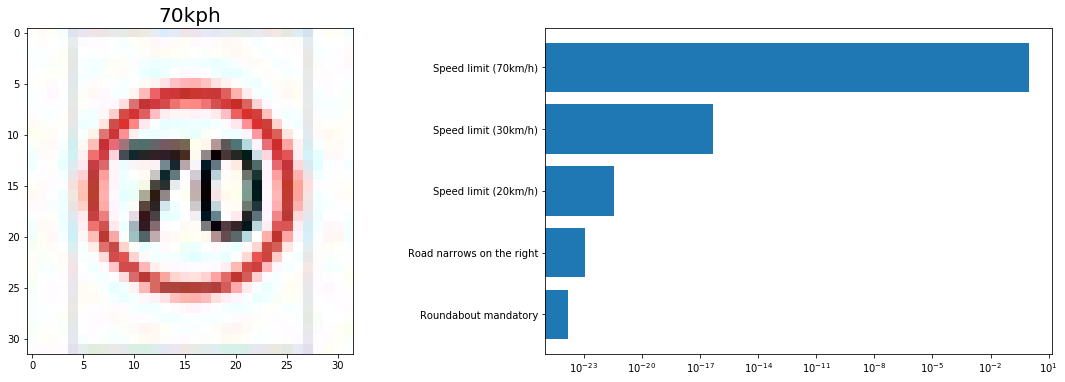

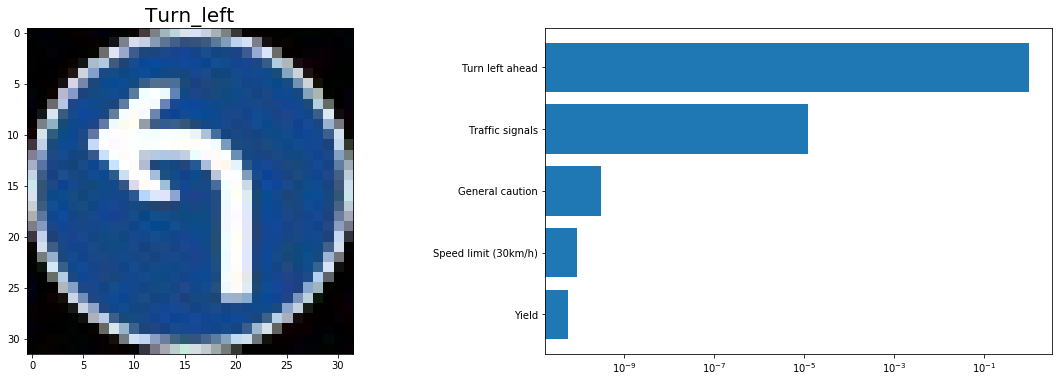

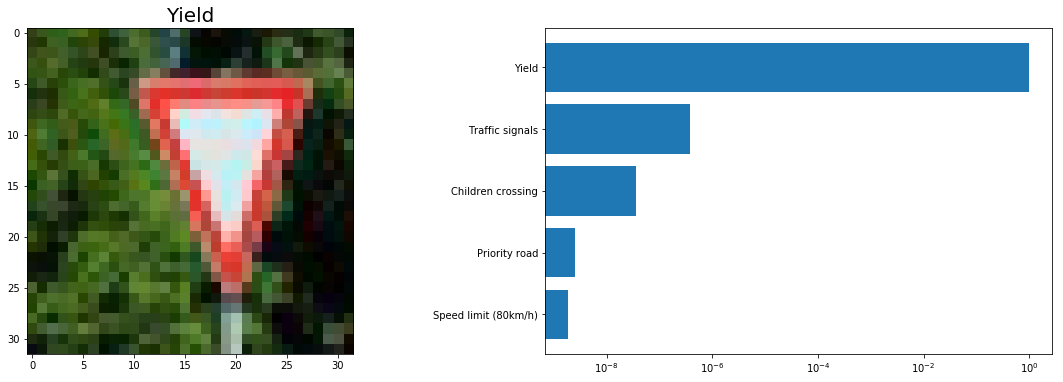

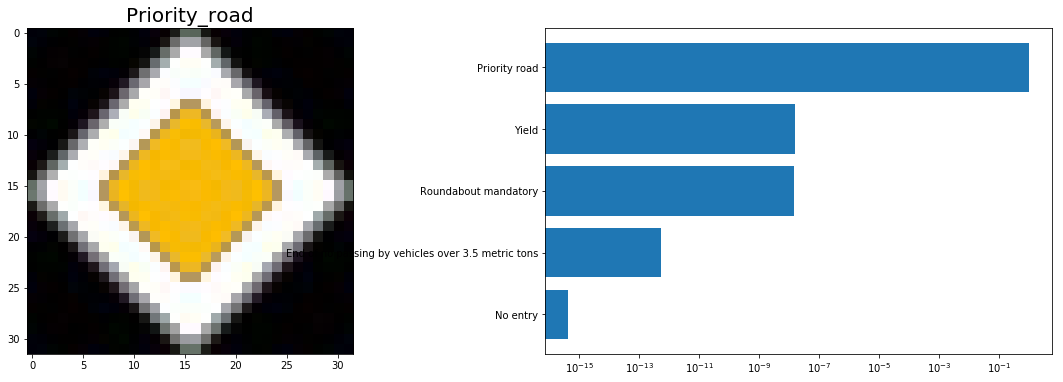

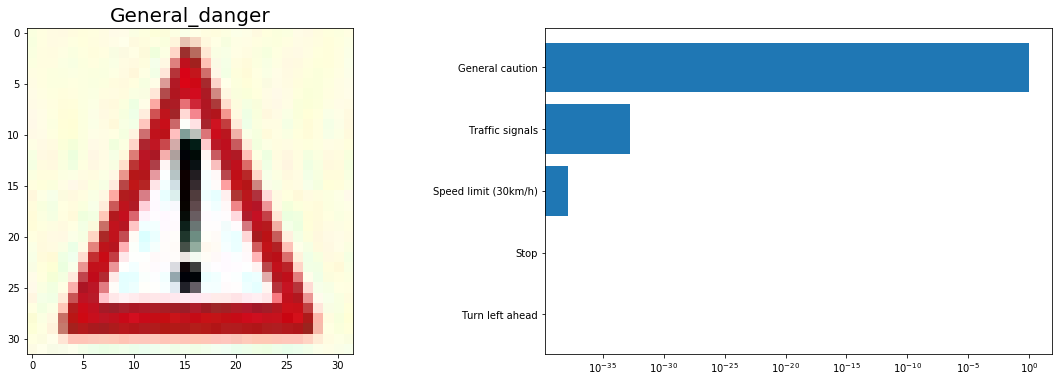

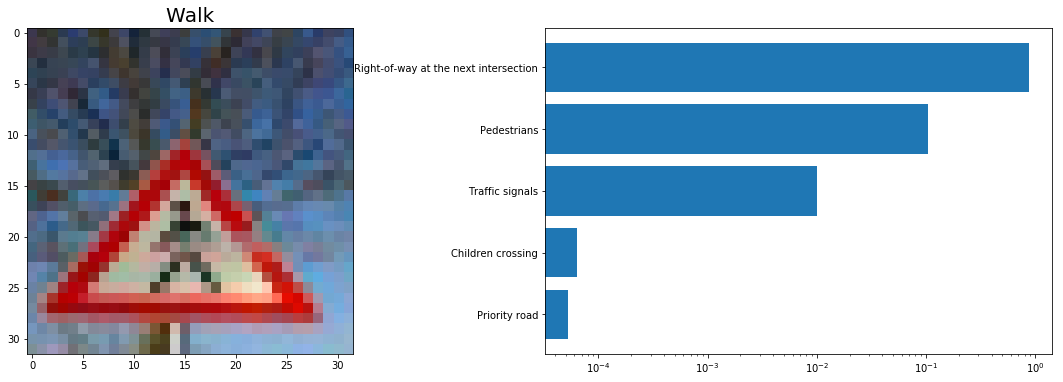

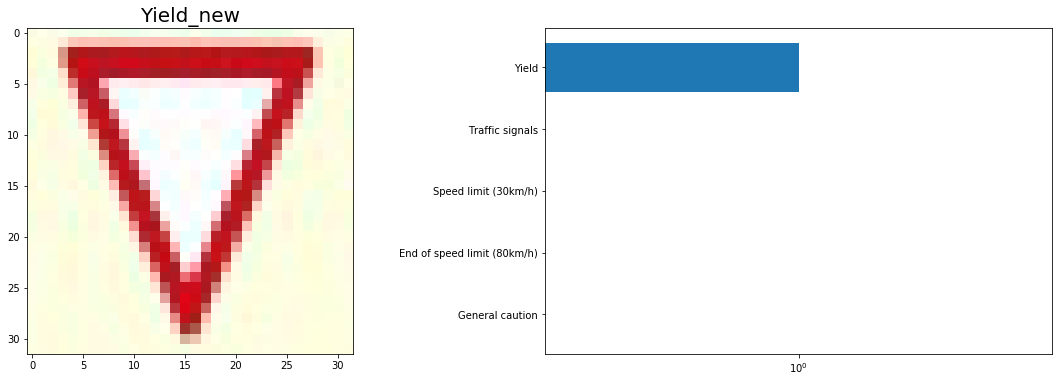

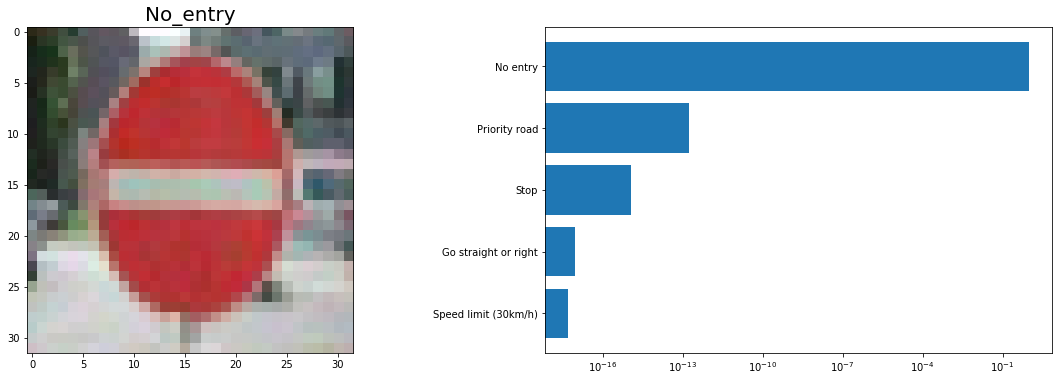

In [18]:
## Used to get predictions of the input images from the trained model

test_img='GTS_Images1/*_res.jpg'
proc_image_set=[]  ## pre-processed (as shown code block 11) image list
image_set=[]       ## resized image 32x32 from the original image downloaded image 
orig_image_set=[]  ## original image downloaded from internet
orig_image_name=[] ## original image name

for img_name in glob.glob(test_img):
    nm=img_name[:-8].split('/')[1]
    img=cv2.imread(img_name)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    orig_img=cv2.imread(img_name[:-8]+'.jpg')
    norm_img=normalzd_image(img)
    
    proc_image_set.append(norm_img) 
    image_set.append(img)
    orig_image_set.append(orig_img)
    orig_image_name.append(nm)
    
## list conversion to array

proc_image_set=np.array(proc_image_set) 
image_set=np.array(image_set)
orig_image_set=np.array(orig_image_set)


prob=[]
index=[]
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model_n.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    ind=sess.run("topk:1",feed_dict={"x:0":proc_image_set})   ## get indexes for top 5 probabbilities
    probability=sess.run("topk:0",feed_dict={"x:0":proc_image_set}) ## get top 5 probabilities of prediction
    
    index.append(ind)
    prob.append(probability)
    
#############################################################################################
## printing of probability and prediction along with original image

for i in range(len(image_set)):
    fig,ax = plt.subplots(1,2,figsize=(20,6))
    ax[0].imshow(image_set[i])
    ax[0].set_title(orig_image_name[i],fontsize=20)
    
    x_pos=range(len(index[0][i]))
    ax[1].barh(x_pos,prob[0][i])
    ax[1].set_yticks(x_pos)
    ax[1].set_yticklabels(sgn['SignName'][index[0][i]],fontsize=10)
    ax[1].invert_yaxis()  
    ax[1].set_xscale('log',nonposx='clip')
    fig.savefig("Predictions/"+orig_image_name[i]+"_pred.jpg")

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [19]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1,sav=0,image_nm=''):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={'x:0' : image_input})
    featuremaps = activation.shape[3]
    fig=plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    if sav==1:
        fig.savefig(image_nm+".jpg")

INFO:tensorflow:Restoring parameters from ./model_n


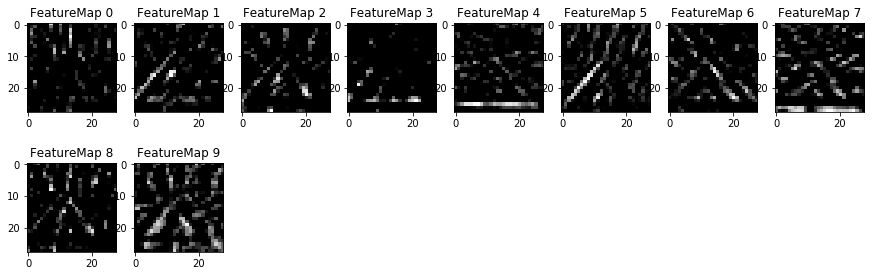

In [20]:
## Visualize layer 1 of Convolutional neural network

img_name='GTS_Images1/Walk_res.jpg'
img=cv2.imread(img_name)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
norm_img=normalzd_image(img)
image_input=np.reshape(norm_img,[1,norm_img.shape[0],norm_img.shape[1],norm_img.shape[2]])
meta='model_n.meta'

my_graph = tf.Graph()
with my_graph.as_default():
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(meta)
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        conv1 = my_graph.get_tensor_by_name('Conv1:0')
        outputFeatureMap(image_input, conv1, activation_min=-1, activation_max=-1 ,plt_num=1,sav=1,image_nm='Convolution Layer 1')


INFO:tensorflow:Restoring parameters from ./model_n


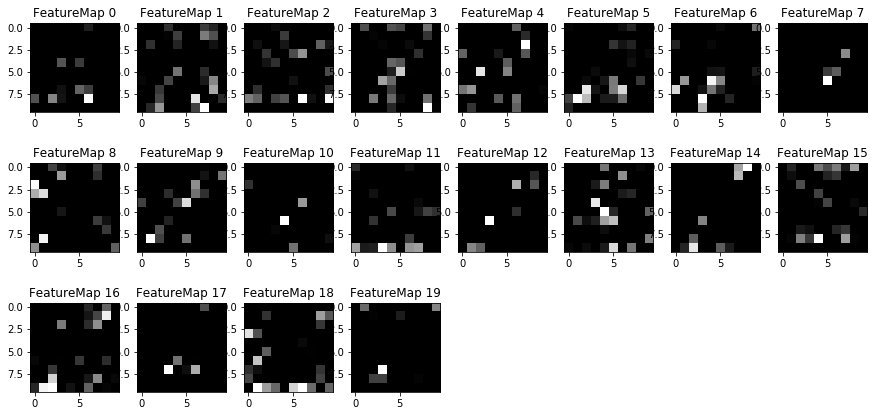

In [21]:
## Visualize layer 2 of Convolutional neural network

my_graph = tf.Graph()
with my_graph.as_default():
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(meta)
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        conv2 = my_graph.get_tensor_by_name('Conv2:0')
        outputFeatureMap(image_input, conv2, activation_min=-1, activation_max=-1 ,plt_num=1,sav=1,image_nm='Convolution Layer 2')